In [1]:
import pandas as pd

FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [2]:
def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

df = join_date_and_time(df)

In [3]:
df = df.set_index('Date')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [4]:
def clean(df):
    df = df.copy()
    for col in df.columns:
        #df = df[~df[col].str.contains('?', regex=False)]
        df[col] = df[col].str.replace('?', 'nan', regex=False).astype(float)
        df = df.fillna(method='ffill')
    return df
df = clean(df)

/tmp/ipykernel_3345/1932446633.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_3345/1932446633.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_3345/1932446633.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_3345/1932446633.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_3345/1932446633.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d

In [5]:
def create_time_series_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [6]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df)

In [8]:
processed_features = transformer.transform(df)
processed_features = pd.DataFrame(processed_features, columns=df.columns)

In [9]:
df = processed_features.set_index(df.index)

In [10]:
daily_resampled_df = create_time_series_features(df.resample('D').mean())
daily_resampled_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,quarter,month,year,dayofyear
Date,,,,,,,,,,,,,
2006-12-16,2.019305,-0.080912,-1.234170,2.096566,0.000000,1.378788,0.672906,0,5,4,12,2006,350
2006-12-17,1.444479,0.390059,-0.241078,1.479806,1.411806,2.907639,0.486152,0,6,4,12,2006,351
2006-12-18,0.766805,0.084627,0.054701,0.764333,0.738194,1.820139,0.513807,0,0,4,12,2006,352
2006-12-19,0.459769,0.033019,0.253052,0.465278,0.582639,5.279167,0.194322,0,1,4,12,2006,353
2006-12-20,0.779324,0.080850,0.332833,0.773472,0.000000,1.838889,0.515645,0,2,4,12,2006,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-22,0.674123,-0.007829,-0.212631,0.682833,3.371528,1.465278,0.355229,0,0,4,11,2010,326
2010-11-23,0.409137,-0.031155,-0.114851,0.414889,1.299306,0.318056,0.252083,0,1,4,11,2010,327
2010-11-24,0.534041,-0.054890,-0.255565,0.529917,0.761111,1.977778,0.440523,0,2,4,11,2010,328


In [11]:
target  = 'Global_active_power'

daily_shifted_df = daily_resampled_df.copy()

daily_shifted_df[target] = daily_shifted_df[target].shift(-1)

daily_shifted_df.loc[daily_shifted_df.index[-1], 'Global_active_power'] = 0.0

# LSTM Model

In [12]:
from torch import nn

class EnergyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=12, hidden_size=50, num_layers=4, batch_first=True)
        self.linear = nn.Linear(50,1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [13]:
import torch
import numpy as np

FEATURES = ["Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3","hour","dayofweek","quarter","month","year","dayofyear"]

TARGET = ["Global_active_power"]

train_df = daily_shifted_df[:'2009-12-31'].fillna(0.0)
test_df = daily_resampled_df['2010-01-01':].fillna(0.0)

X_train = train_df[FEATURES]
y_train = train_df[TARGET] 

X_test = test_df[FEATURES]
y_test = test_df[TARGET] 

X_train = torch.tensor(X_train.values.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32))

X_test = torch.tensor(X_test.values.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.float32))

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [14]:
import torch.optim as optim
import torch.utils.data as data

model = EnergyModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

model.to(device)

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=1000)

epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 400

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in loader:
      y_pred = model(X_batch)
      loss = torch.sqrt(loss_fn(y_pred, y_batch))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    if epoch % 10 != 0:
        continue
    
    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = np.sqrt(loss_fn(y_pred, y_test).cpu())
        
        epoch_count.append(epoch)
        train_loss_values.append(loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.cpu().detach().numpy())
    print(f"Epoch: {epoch} | RMSE Train Loss: {loss} | RMSE Test Loss: {test_loss} ")

Epoch: 0 | RMSE Train Loss: 0.5832385420799255 | RMSE Test Loss: 0.46398860216140747 
Epoch: 10 | RMSE Train Loss: 0.31230106949806213 | RMSE Test Loss: 0.29248046875 
Epoch: 20 | RMSE Train Loss: 0.42527705430984497 | RMSE Test Loss: 0.2920941710472107 
Epoch: 30 | RMSE Train Loss: 0.33113136887550354 | RMSE Test Loss: 0.29162684082984924 
Epoch: 40 | RMSE Train Loss: 0.3987581133842468 | RMSE Test Loss: 0.2927115261554718 
Epoch: 50 | RMSE Train Loss: 0.34709465503692627 | RMSE Test Loss: 0.29167118668556213 
Epoch: 60 | RMSE Train Loss: 0.4008583128452301 | RMSE Test Loss: 0.2921196520328522 
Epoch: 70 | RMSE Train Loss: 0.3841257095336914 | RMSE Test Loss: 0.2932250499725342 
Epoch: 80 | RMSE Train Loss: 0.3739275634288788 | RMSE Test Loss: 0.29233577847480774 
Epoch: 90 | RMSE Train Loss: 0.35313665866851807 | RMSE Test Loss: 0.2898767292499542 
Epoch: 100 | RMSE Train Loss: 0.37505975365638733 | RMSE Test Loss: 0.2885804772377014 
Epoch: 110 | RMSE Train Loss: 0.3607367277145386 

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = model(X_test)
mean_squared_error(y_test.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), squared=False)

0.28407735

In [16]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test.cpu().detach().numpy(), y_pred.cpu().detach().numpy())

3.1983328

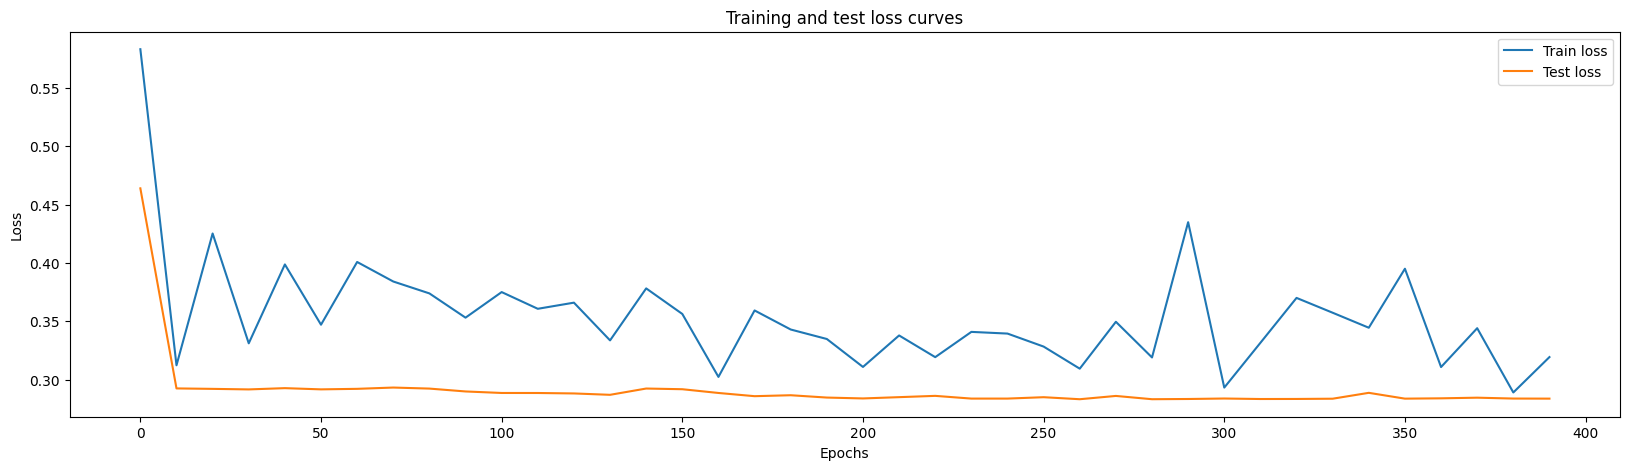

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

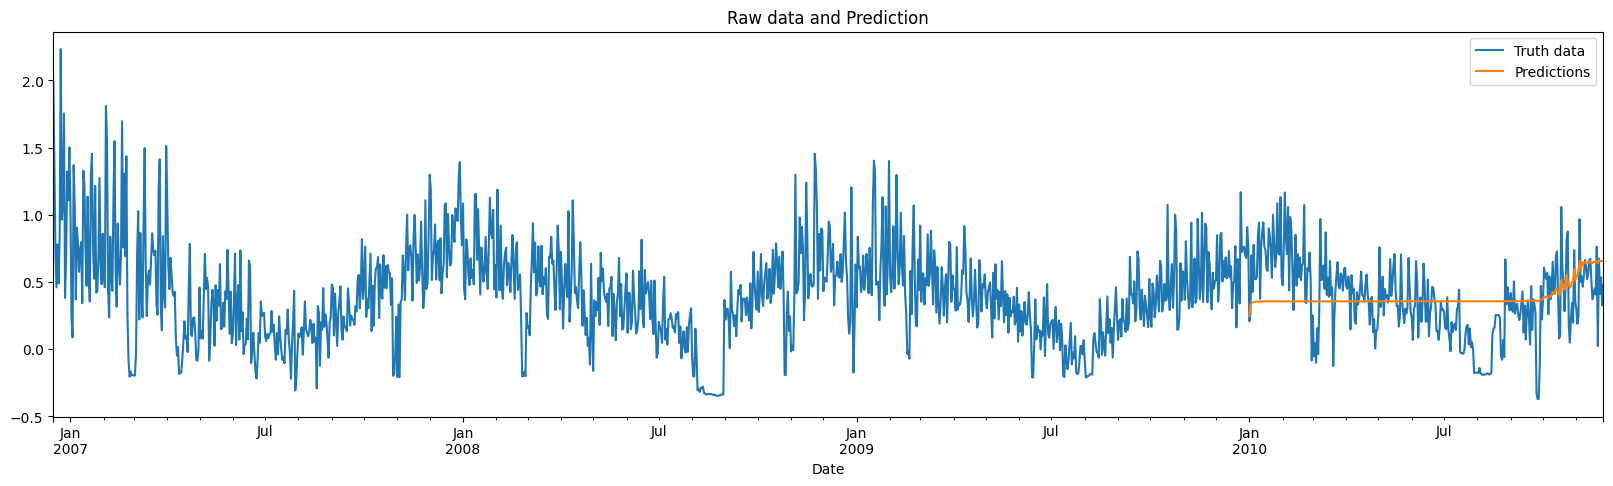

In [18]:
prediction_df = pd.DataFrame()
prediction_df['prediction'] = pd.DataFrame(data=y_pred.cpu().detach().numpy(), index=test_df.index)

daily_resampled_df = daily_resampled_df.merge(prediction_df[['prediction']], how='left', left_index=True, right_index=True)
ax = daily_resampled_df['Global_active_power'].plot()
daily_resampled_df['prediction'].plot(ax=ax)
plt.legend(["Truth data", "Predictions"])
ax.set_title("Raw data and Prediction")
plt.show()

In [19]:
%pip install skorch

  Obtaining dependency information for skorch from https://files.pythonhosted.org/packages/7a/7e/aca63fab758a7ddb1f043a0ee8c77f06bbb92d99bb8baf17047f09a328f5/skorch-0.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm>=4.14.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 5.9 MB/s eta 0:00:0000:01
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from torch import nn

class EnergyModel(nn.Module):
    def __init__(self, n_neurons=32):
        super().__init__()
        self.lstm = nn.LSTM(input_size=12, hidden_size=n_neurons, num_layers=4, batch_first=True)
        self.linear = nn.Linear(50,1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [78]:
y_aux = y_train.cpu().numpy()
X_aux = X_train.cpu().numpy()
X_aux.shape, y_aux.shape

((1112, 12), (1112, 1))

In [83]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

model = NeuralNetClassifier(
    EnergyModel,
    criterion=nn.MSELoss,
    optimizer=optim.Adamax,
    max_epochs=400,
    batch_size=1000,
    verbose=False,
    device="cuda",
)

param_grid = {
    'module__n_neurons': [1, 5, 10, 15, 20, 25, 30]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(X_aux, y_aux)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: 
All the 28 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/skorch/classifier.py", line 165, in fit
    return super(NeuralNetClassifier, self).fit(X, y, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/skorch/net.py", line 1319, in fit
    self.partial_fit(X, y, **fit_params)
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/skorch/net.py", line 1278, in partial_fit
    self.fit_loop(X, y, **fit_params)
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/skorch/net.py", line 1176, in fit_loop
    dataset_train, dataset_valid = self.get_split_datasets(
                                   ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/skorch/net.py", line 1771, in get_split_datasets
    return self.train_split(dataset, y, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/carlos/Documents/git/machine-learning-101/.env/lib/python3.11/site-packages/skorch/dataset.py", line 314, in __call__
    raise bad_y_error
ValueError: Stratified CV requires explicitly passing a suitable y.
